<a href="https://colab.research.google.com/github/bilalbenmessahel/bilalbenmessahel/blob/main/Tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem: Predicting y values from x using the equation y=w⋅x+b   where w (weight) and b (bias) are parameters that we want to learn.

1.	Import **Libraries**  

In [59]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


2.	Create Sample Data
Let’s create some synthetic data that follows a linear pattern with some noise.


In [60]:
# Generate synthetic data: y = 2 * x + 1 + noise
torch.manual_seed(0)
X = torch.linspace(0, 10, 100).reshape(-1, 1)  # Inputs (100 points)
Y = 2 * X + 1   + torch.randn(100, 1) * 2  # Outputs with some added noise


# Plot the generated data

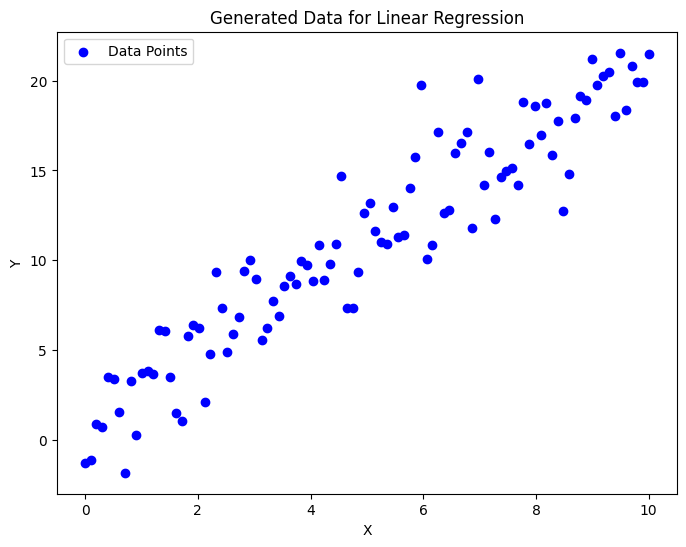

In [61]:
# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data for Linear Regression')
plt.legend()
plt.show()

3.	Define the Model
In PyTorch, we define a linear regression model as a single layer with no activation.

In [62]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        #self.linear = nn.Linear(1, 1)  # Single input and single output
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float32), requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float32), requires_grad=True)

    def forward(self, x):
        # y=weight * x + bias
        #return self.linear(x)
        return self.weights*x+self.bias



Instance Creation of the model

In [63]:
torch.manual_seed(0)
model = LinearRegressionModel()
list(model.parameters()) # showing the parameters of the model
model.state_dict() # showing the parameters of the model

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])

Drawing the model before the training

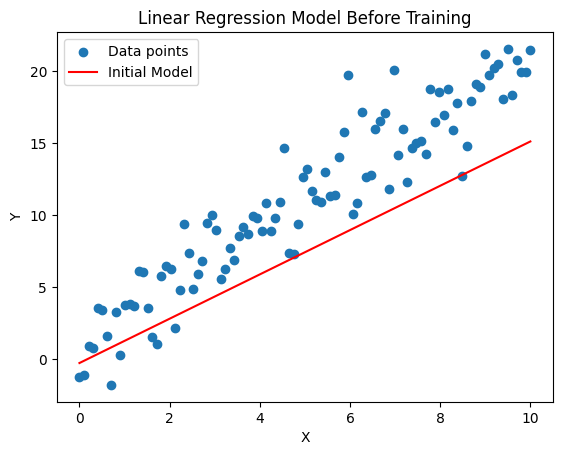

In [64]:
# Extract initial weights and bias
initial_weight = model.weights.item()
initial_bias = model.bias.item()


# Plotting the data points and the initial line
plt.scatter(X.numpy(), Y.numpy(), label="Data points")
plt.plot(X.numpy(), (initial_weight * X + initial_bias).numpy(), color="red", label="Initial Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression Model Before Training")
plt.show()

\4.	Set the Loss Function and Optimizer
•	Loss Function: Mean Absolute Error L1 loss (MAE) or Mean Squared Error (MSE) is commonly used for regression.
•	Optimizer: Stochastic Gradient Descent (SGD) or Adam are popular choices.


In [65]:
#criterion = nn.MSELoss()
loss_func=nn.L1Loss()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


5.	 Training Loop
Train the model by adjusting the parameters (w and b) to minimize the loss.
For the training loop, we'll build the following steps:

  1.   Forward pass
  2.   Calculate the loss
  3.   Zero gradients
  4.   Perform backpropagation on the loss
  5.   Update the optimizer (gradient descent)








In [66]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: Compute prediction and loss
    predictions = model(X)
    loss = loss_func(predictions, Y)

    # Backward pass: Compute gradients and update parameters
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update parameters

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 1.6778
Epoch [200/1000], Loss: 1.6597
Epoch [300/1000], Loss: 1.6472
Epoch [400/1000], Loss: 1.6354
Epoch [500/1000], Loss: 1.6287
Epoch [600/1000], Loss: 1.6254
Epoch [700/1000], Loss: 1.6223
Epoch [800/1000], Loss: 1.6211
Epoch [900/1000], Loss: 1.6203
Epoch [1000/1000], Loss: 1.6195


6.	Evaluate the Model
After training, we can visualize the fitted line against the data.


In [67]:
# Plot the data and the model's predictions
with torch.no_grad():
    predicted = model(X).detach()  # Get predictions

loss_test=loss_func(predicted,Y)
print(loss_test)
model.state_dict()

tensor(1.6195)


OrderedDict([('weights', tensor([2.0649])), ('bias', tensor([0.5694]))])

Drawing the trained model

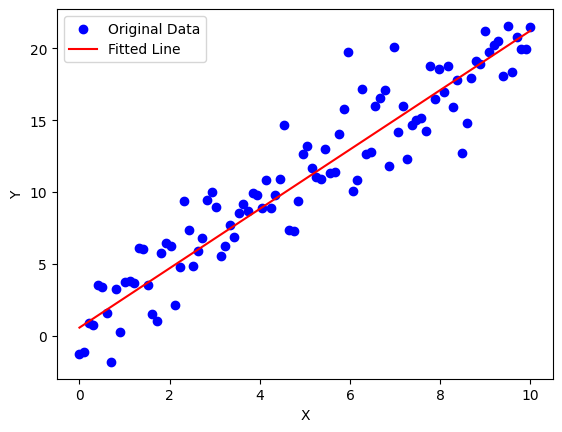

In [68]:
plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Original Data')
plt.plot(X.numpy(), predicted.numpy(), color='red', label='Fitted Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

7.	Save the Model (Optional)

In [69]:
torch.save(model.state_dict(), 'linear_regression_model.pth')

Example about auto grad

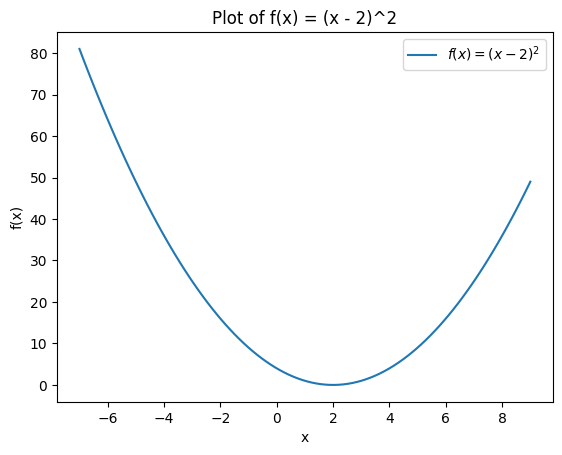

In [70]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return torch.pow((x - 2.0), 2)

# Generate x-axis values
x_axis_vals = np.linspace(-7, 9, 100)

# Calculate y-axis values using the function and convert to numpy for plotting
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

# Plot the function
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = (x - 2)^2')
plt.legend()
plt.show()


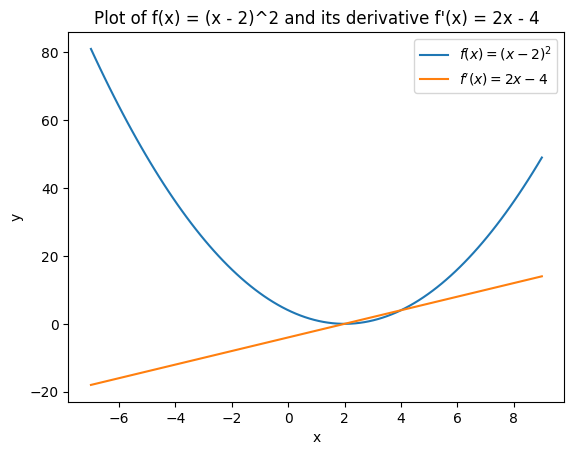

In [71]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the original function
def f(x):
    return torch.pow((x - 2.0), 2)

# Define the derivative of the function
def fP(x):
    return 2 * x - 4

# Generate x-axis values
x_axis_vals = np.linspace(-7, 9, 100)

# Calculate y-axis values for f(x) and f'(x)
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()
y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

# Plot f(x) and f'(x) on the same graph
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="$f'(x)=2x-4$")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Plot of f(x) = (x - 2)^2 and its derivative f'(x) = 2x - 4")
plt.legend()
plt.show()


In [72]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)
y=f(x)
y.backward()
print(x.grad)


None
tensor([-11.])


In [73]:
import torch

# Define the function to be optimized
def f(x):
    return torch.pow((x - 2.0), 2)


# Initialize the tensor with requires_grad=True
x = torch.tensor([-3.5], requires_grad=True)
x_cur = x.clone()
print(x_cur)
x_prev = x_cur * 100
print(x_prev)

# Set optimization parameters
epsilon = 1e-5
eta = 0.1

# Optimization loop
while torch.linalg.norm(x_cur - x_prev ) > epsilon:
    # Compute the function value and its gradient
    x_prev =x_cur.clone()
    y = f(x)
    y.backward()
    x.data -= eta * x.grad
    x.grad.zero_()
    x_cur =x.data
# Print the final value of x
print(x)



tensor([-3.5000], grad_fn=<CloneBackward0>)
tensor([-350.], grad_fn=<MulBackward0>)
tensor([2.0000], requires_grad=True)


Now using parameters and optimizer


In [74]:
x_param = nn.Parameter(torch.tensor([-3.5]), requires_grad=True)
optimizer = torch.optim.SGD([x_param], lr=eta)
for epoch in range(100):
    # Forward pass: Compute prediction and loss
    loss=f(x)
    # Backward pass: Compute gradients and update parameters
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update parameters
    print(f'Epoch [{epoch+1}/{100}], Loss: {loss.item():.4f}')

print(x)




Epoch [1/100], Loss: 0.0000
Epoch [2/100], Loss: 0.0000
Epoch [3/100], Loss: 0.0000
Epoch [4/100], Loss: 0.0000
Epoch [5/100], Loss: 0.0000
Epoch [6/100], Loss: 0.0000
Epoch [7/100], Loss: 0.0000
Epoch [8/100], Loss: 0.0000
Epoch [9/100], Loss: 0.0000
Epoch [10/100], Loss: 0.0000
Epoch [11/100], Loss: 0.0000
Epoch [12/100], Loss: 0.0000
Epoch [13/100], Loss: 0.0000
Epoch [14/100], Loss: 0.0000
Epoch [15/100], Loss: 0.0000
Epoch [16/100], Loss: 0.0000
Epoch [17/100], Loss: 0.0000
Epoch [18/100], Loss: 0.0000
Epoch [19/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0000
Epoch [21/100], Loss: 0.0000
Epoch [22/100], Loss: 0.0000
Epoch [23/100], Loss: 0.0000
Epoch [24/100], Loss: 0.0000
Epoch [25/100], Loss: 0.0000
Epoch [26/100], Loss: 0.0000
Epoch [27/100], Loss: 0.0000
Epoch [28/100], Loss: 0.0000
Epoch [29/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0000
Epoch [31/100], Loss: 0.0000
Epoch [32/100], Loss: 0.0000
Epoch [33/100], Loss: 0.0000
Epoch [34/100], Loss: 0.0000
Epoch [35/100], Loss: 0